In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils

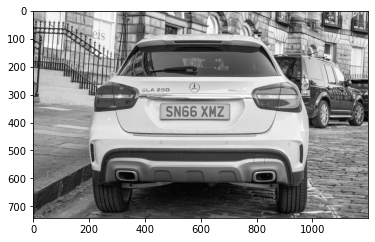

In [68]:
car_img = cv.imread("Images/Car_plate_en2.jpg")
car_img_gray = cv.cvtColor(car_img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(car_img_gray, cv.COLOR_BGR2RGB))

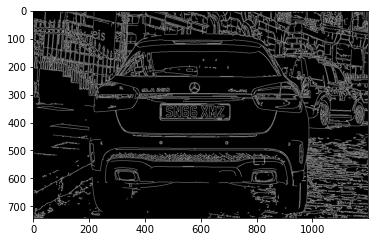

In [74]:
blateral_filtered = cv.bilateralFilter(car_img_gray, 31, 19, 19)
edges = cv.Canny(blateral_filtered, 90, 200)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

In [75]:
contours = cv.findContours(edges.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
contours_sorted = sorted(contours_refined, key=cv.contourArea, reverse=True)[:4]

In [76]:
for contour in contours_sorted:
    contour_approx = cv.approxPolyDP(contour, 20, True)
    if len(contour_approx) == 4:
        plate_location = contour_approx
        break

In [77]:
plate_location

array([[[455, 336]],

       [[458, 393]],

       [[706, 385]],

       [[702, 334]]], dtype=int32)

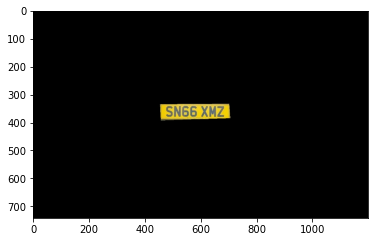

In [78]:
plate_mask0 = np.zeros(car_img_gray.shape, np.uint8)
plate_mask = cv.drawContours(plate_mask0, [plate_location], 0, 255, -1)
plate_img = cv.bitwise_and(car_img, car_img, mask = plate_mask)
plt.imshow(cv.cvtColor(plate_img, cv.COLOR_BGR2RGB))